This simulation aims to show some unexpected results on the motoneuron spike times when the Renshaw cell is present.

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool

In [2]:
def simulator(nS, nFR, nFF, nRC, current, duration, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC):

    conf = Configuration('confuchiyama.rmto')
    #import pdb; pdb.set_trace()
    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = nS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = nFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = nFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = nRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
        # Dynamics of MN-RC synapse
        idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = None
        idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = None
        idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = None
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    MN_mV = np.zeros((pools[0].MUnumber, len(t)))
    RC_mV = np.zeros((pools[1].Nnumber, len(t)))
    for i in xrange(0, len(t)):
        # Injected current in the soma of MNs
        for j in xrange(1, pools[0].MUnumber, 2):
            if i == 0:
                pools[0].iInjected[j] = 0
            else:    
                pools[0].iInjected[j] = float(current)/duration*t[i]
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
#         pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        for j in xrange(pools[0].MUnumber):
            MN_mV[j, i] = pools[0].v_mV[2*j+1]
        for j in xrange(pools[1].Nnumber):
            RC_mV[j, i] = pools[1].v_mV[j]

    pools[0].listSpikes()
    pools[1].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1, pools[1].poolSomaSpikes[:, 0], pools[1].poolSomaSpikes[:, 1]+1

In [3]:
nS = 75
nFR = 75
nFF = 150
nRC = 300

params = 'final'
i = 20
dur = 1000
MNRCdecay = 1/6.0
RCMNdecay = 3.5/3
posMN = 7
posRC = 7

tic = time.clock()
spikeTimesMN, spikingMN, spikeTimesRC, SpikingRC = simulator(nS, nFR, nFF, nRC, i, dur, params, MNRCdecay, RCMNdecay, posMN, posRC)
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37646 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
869.388419 seconds


<IPython.core.display.Javascript object>


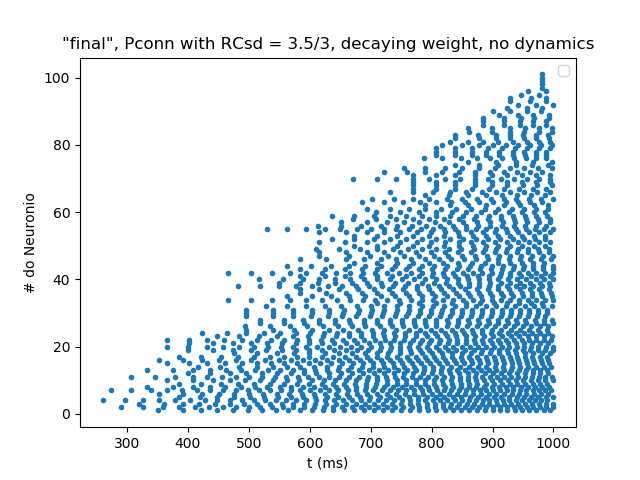

In [4]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, decaying weight, no dynamics')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


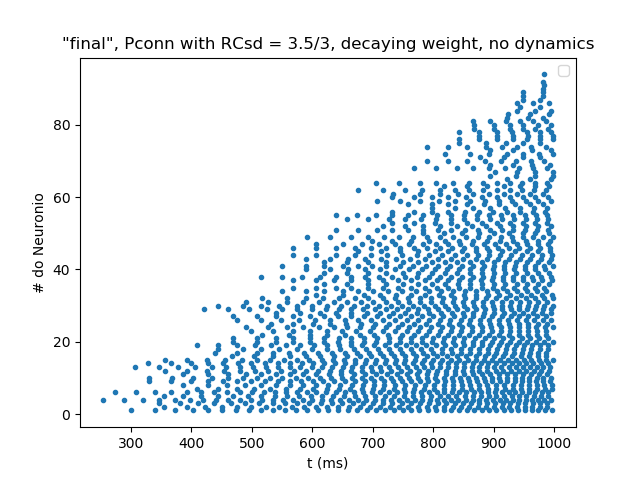

In [5]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, decaying weight, no dynamics')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


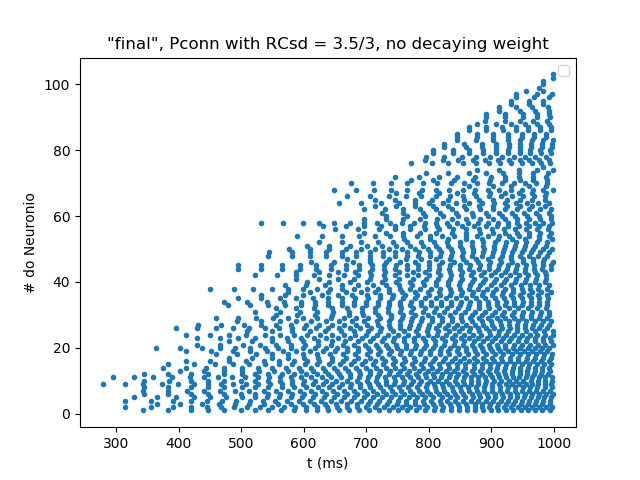

In [6]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, no decaying weight')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


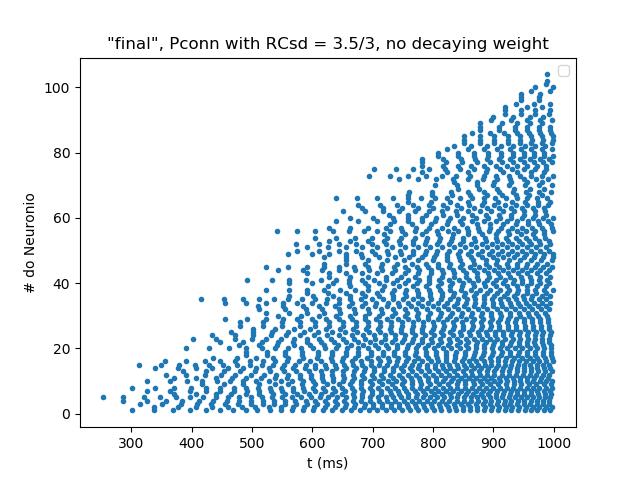

In [4]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, no decaying weight')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


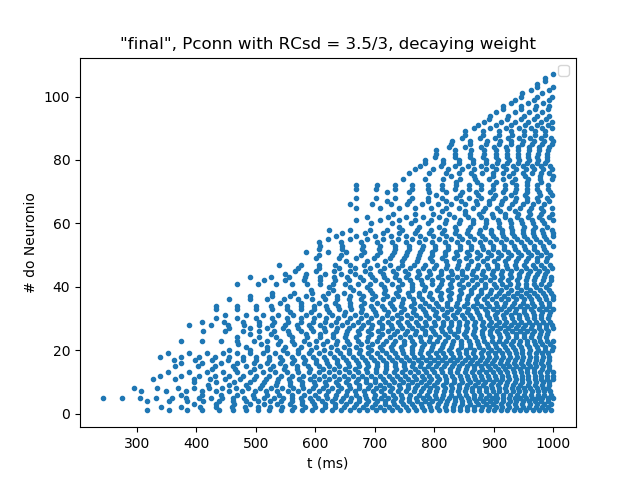

In [12]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, decaying weight')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


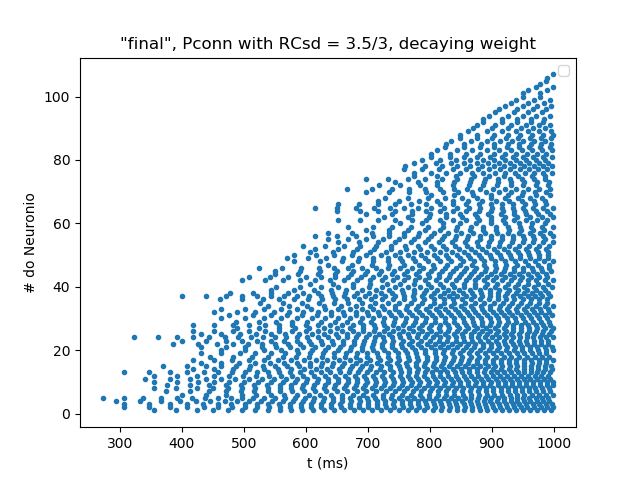

In [5]:
plt.figure()
plt.plot(spikeTimesMN, spikingMN, '.')#, label = "Motoneuronios")
plt.title ('"final", Pconn with RCsd = 3.5/3, decaying weight')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Neuronio')
plt.show()

<IPython.core.display.Javascript object>


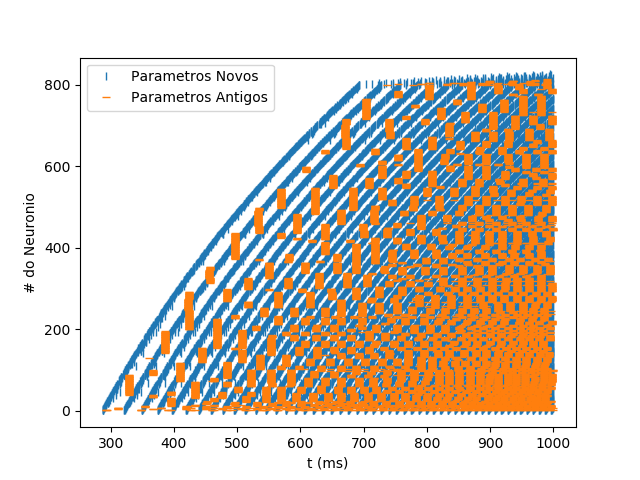

In [8]:
# plt.figure()
# plt.plot(spikeTimesMN_new, spikingMN_new, '|', label = "Parametros Novos")
# plt.plot(spikeTimesMN_old, spikingMN_old, '_', label = "Parametros Antigos")
# plt.legend()
# plt.xlabel('t (ms)')
# plt.ylabel('# do Neuronio')
# #plt.title('Comparacao dos Parametros')
# plt.show()